# Visualizing Illinois vest20 with state senate districts

@authors: vcle, bpuhani


## Loading needed libraries

In [56]:
import sys

import utilities as util
import maup
import warnings
import time
import io

In [57]:
maup.progress.enabled = False

warnings.filterwarnings('ignore')

start_time = time.time()

### configuration to capture print output
original_stdout = sys.stdout

## Loading the needed data.
For this notebook to work we assume, that you ran the following notebooks first:
* `0_IL_import_and_explore_data.ipynb`
* `A_2_IL_clean_maup_with_senate.ipynb`


In [58]:
il_df = util.load_shapefile("il_data/IL_state_senate.shp")

Loading shapefile from il_data/IL.shp...
Shapefile data loaded from cache.


## Examining `il_df` further
Because we had some issues with the `vest20_df` in Oregon, lets make a deep dive into the data.
Let's run `maup.doctor` for each of the districts in the `il_df` and see if there are any issues with the data.


### Run `maup.doctor` for each district

In [64]:
# we know that Illinois has 59 districts
nr_of_districts = len(set(il_df["SEND"]))
assert (nr_of_districts == 59), f"Number of districts in Illinois: {nr_of_districts} != 59"

districts_with_issues = {}

# Create a StringIO object to capture the output
captured_output = io.StringIO()

for district in set(il_df["SEND"]):
    district_df = il_df[il_df["SEND"] == district]
    print("Checking district: ", district)
    success: bool = False
    output: str = ""

    try:
        # Redirect stdout to the StringIO object
        sys.stdout = captured_output

        try:
            # maup.doctor(district_df) will return True if there are no issues
            success = maup.doctor(district_df)
        except Exception as e:
            print(f"Error in MAUP Doctor for district {district}: {e}")

        # Get the captured output as a string without new lines
        output = captured_output.getvalue().replace("\n", "")

    finally:
        # Restore the original stdout
        sys.stdout = original_stdout
        captured_output.truncate(0) # Clear the StringIO buffer
        captured_output.seek(0) # Reset the cursor to the beginning
        if not success:
            print(f"Problem in district {district}: {output}")
            districts_with_issues[district] = output

captured_output.close()

Checking district:  1
Checking district:  2
Checking district:  3
Checking district:  4
Checking district:  5
Checking district:  6
Checking district:  7
Checking district:  8
Checking district:  9
Checking district:  10
Checking district:  11
Checking district:  12
Checking district:  13
Checking district:  14
Checking district:  15
Checking district:  16
Problem in district 16: There are 1 holes.
Checking district:  17
Checking district:  18
Checking district:  19
Checking district:  20
Checking district:  21
Checking district:  22
Checking district:  23
Checking district:  24
Checking district:  25
Checking district:  26
Checking district:  27
Checking district:  28
Checking district:  29
Checking district:  30
Checking district:  31
Problem in district 31: There are 1 holes.
Checking district:  32
Checking district:  33
Problem in district 33: There are 1 holes.
Checking district:  34
Problem in district 34: There are 6 holes.
Checking district:  35
Problem in district 35: There ar

There seem to be some districts with holes.

In [71]:
print("There are a total of", len(districts_with_issues), "districts with issues.")

There are a total of 15 districts with issues.


Let's take a deeper look at the districts with issues.

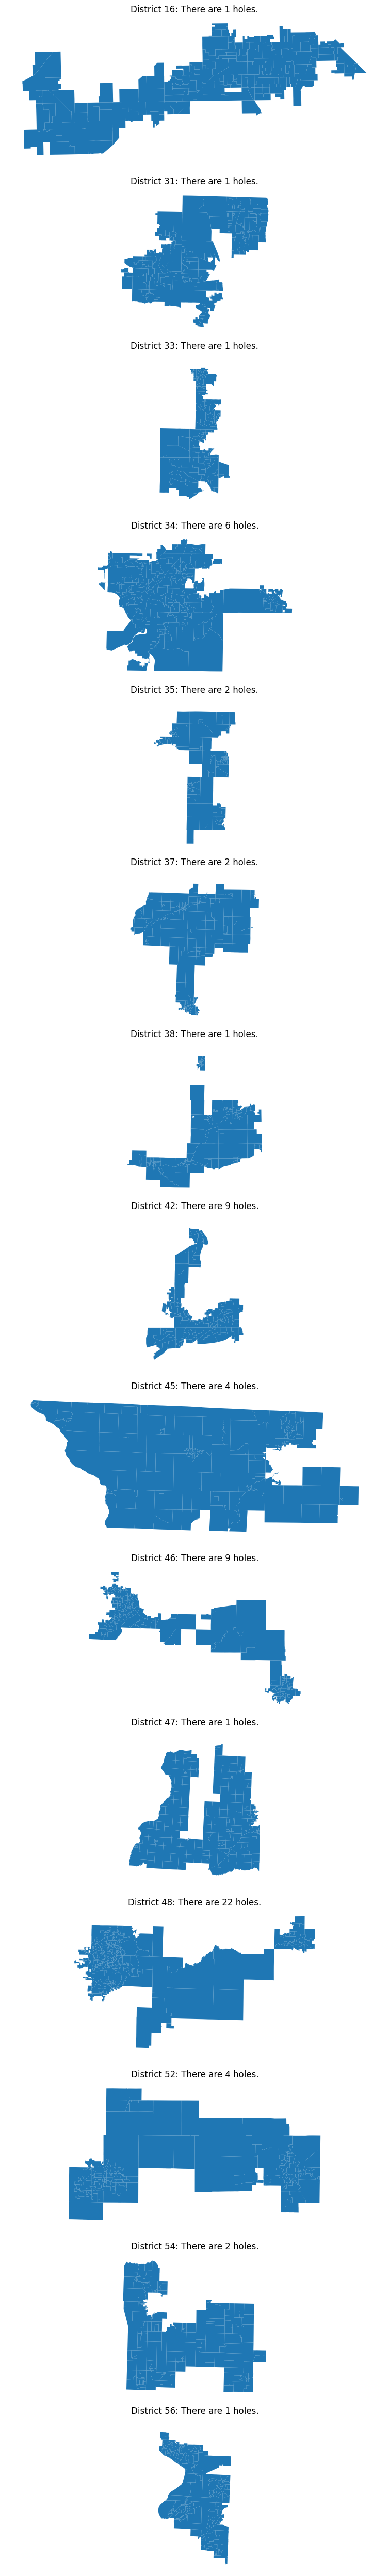

In [69]:
# draw each of the districts with issues into a subplot
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(districts_with_issues), 1, figsize=(50, 50))
axs = axs.flatten()
for i, district in enumerate(districts_with_issues):
    district_df = il_df[il_df["SEND"] == district]
    district_df.plot(ax=axs[i], legend=True)
    axs[i].set_title(f"District {district}: {districts_with_issues[district]}")
    axs[i].axis('off')
plt.tight_layout()
plt.savefig("images/IL_visualize_failing_districts.svg", format="svg", bbox_inches='tight')
plt.show()

## Let's try to draw all districts at once